### **Business Understanding**


### *Business Problem*
The primary business problem is to predict the likelihood that individuals will receive the seasonal flu vaccines in the **United States** based on their backgounds, opinions, and health-related behaviors. By understanding the factors that influence vaccine uptake, we can help the public health organizations and healthcare providers to design more effective vaccination campaigns and help policy makers allocate resources more efficiently. This will ultimately improve vaccination rates thus reducing the spread of these viruses.

### *Specific Questions to Address*
1. *Which factors most influence the decision to get vaccinated?*
   - Identifying key demographic, behavioral, or opinion-based variables that are strong predictors of vaccine uptake.
  
2. *Can we accurately predict who is likely to get vaccinated?*
   - Building a predictive model to classify individuals as likely or unlikely to get vaccinated.

3. *How can public health interventions be targeted more effectively?*
   - Using the model’s insights to inform public health strategies, such as targeted communication or incentives for groups less likely to get vaccinated.

### *Use Case or Stakeholders to our model*
This analysis could be used by:
- **Public Health Departments**: To identify segments of the population that are less likely to get vaccinated and develop targeted interventions.
- **Healthcare Providers**: Can use the model to identify patients who are less likely to get vaccinated and engage in targeted outreach.
- **Policy Makers**: To allocate resources and plan vaccination drives more effectively based on predicted uptake.

### *Outcome*
The expected outcome is a **predictive model** that helps in identifying the likelihood of individuals receiving the vaccine, which can then be used to tailor public health campaigns and interventions, ultimately aiming to increase vaccination rates and reduce the spread of illness.

### *Potential Impact*
- **Improved Vaccination Rates**: By identifying the determinants of vaccine uptake, targeted interventions can be designed to increase vaccination rates, leading to better public health outcomes.
- **Resource Optimization**: Health departments can allocate resources more effectively by focusing efforts on groups identified as less likely to get vaccinated.
- **Policy Development**: Data-driven policies can be developed to address barriers to vaccination, such as misinformation or access issues.


### Loading our dataset to be used in our analysis

In [24]:
import pandas as pd
import numpy as np
#Loading the training dataset
train_df = pd.read_csv("training_set_features.csv")
test_df = pd.read_csv("test_set_features.csv")
training_labels = pd.read_csv("training_set_labels.csv")


### Data Exploration and Understing
- Understanding the data structure
- Understanding the data types
- Handling missing values
- Checking for outliers
- Checking for inconsistencies

In [25]:
# Understanding the data structures and types
train_df.info()

train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


#### Dropping unwanted columns

In [77]:
# Dropping unwanted columns before we start processing our data
# Defining columns to drop
columns_to_drop = ["respondent_id", "h1n1_concern", "h1n1_knowledge", "doctor_recc_h1n1",
                   "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc"]

# Droping columns if they exist in the DataFrame
train_df = train_df.drop(columns=[col for col in columns_to_drop if col in train_df.columns], axis=1)

### Checking for missing values, possible outliers, and any inconsistency in our data

#### Checking missing values per column and per row and visualizing the same to have a better understanding

In [78]:
# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Check for missing values in rows
missing_rows = train_df.isnull().any(axis=1)
print(f"Number of rows with missing values: {missing_rows.sum()}")

Missing values per column:
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
household_adults                 249
household_c

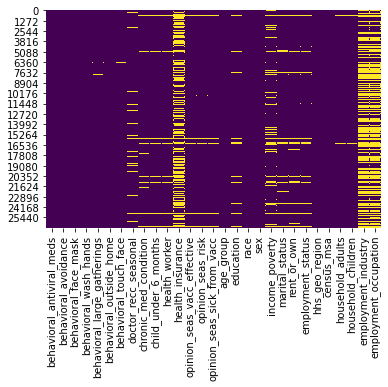

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.show()

### Checking for inconsistencies

In [80]:
# Function to check types in a column
def check_column_types(column):
    return column.apply(type).value_counts()

# Apply the function to each column and store the results
type_summary = {}
for col in train_data_imputed.columns:
    type_summary[col] = check_column_types(train_data_imputed[col])

# Print out type summaries
print("\nType summaries for each column:")
for col, types in type_summary.items():
    print(f"Unexpected types in column '{col}':")
    print(types)

# Detect columns with mixed types
mixed_type_columns = {col: types for col, types in type_summary.items() if len(types) > 1}

print("\nColumns with mixed types:")
for col, types in mixed_type_columns.items():
    print(f"Column '{col}' has the following types:")
    print(types)

NameError: name 'train_data_imputed' is not defined

### Pre-processing the data before feature selection

- Handling missing values
- Encoding categorical variables
- Scaling numerical features
- Checking and visualizing outliers

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Handle missing values
numerical_cols = train_df.select_dtypes(include=[float, int]).columns
categorical_cols = train_df.select_dtypes(include=[object, 'category']).columns

# Impute missing values
numerical_imputer = SimpleImputer(strategy='mean')
train_df[numerical_cols] = numerical_imputer.fit_transform(train_df[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
train_df[categorical_cols] = categorical_imputer.fit_transform(train_df[categorical_cols])

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(train_df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with original DataFrame
train_df_encoded = pd.concat([train_df.drop(columns=categorical_cols), encoded_categorical_df], axis=1)

# Scale numerical features
scaler = StandardScaler()
train_df_encoded[numerical_cols] = scaler.fit_transform(train_df_encoded[numerical_cols])

print(train_df_encoded.head())


#### Identifying outliers using the statistical method - Z-score

In [ ]:
from scipy import stats

# Compute Z-scores
z_scores = stats.zscore(train_df_encoded.select_dtypes(include=[float, int]))

# Identify outliers based on Z-score (commonly, |z| > 3)
outliers = (abs(z_scores) > 3).any(axis=1)
print(f"Number of outlier rows: {outliers.sum()}")


#### Visualizing outliers

In [ ]:
# Plotting outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

# combining features and target
X = train_df_encoded
y = training_labels["seasonal_vaccine"]
combined_df = pd.concat([X, y], axis=1)

n_features = len(X.columns)
n_cols = 4  # Number of columns in the grid
n_rows = math.ceil(n_features / n_cols)  # Number of rows in the grid

plt.figure(figsize=(20, n_rows * 5))  # Adjust height based on number of rows

for i, column in enumerate(X.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=y, y=combined_df[column])
    plt.title(f"Boxplot of {column} by Target")
plt.tight_layout()     
plt.show()

### Using Log Transformation to handle variance (skewness) identified above in our features
This will stabilize the variance and make patterns in the data more interpretable, making the features more beneicial to our model

In [81]:
# Apply log1p transformation to all columns
X_log_transformed = train_df_encoded.apply(np.log1p)

# Building Our Model Now

### Splitting the data after preprocessing

In [82]:
from sklearn.model_selection import train_test_split

X = train_df_encoded  # Features
y = training_labels["seasonal_vaccine"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature selection after we have pre-processed our data
### Model Training 
- Using Logistic Regression Model
- Using Random Forest Classifier
#### Using Wrapper method - Recursive Feature Selection
#### Using Embeded method - Random Forest Classifier
### Model Evaluation
- Using metrics such as:
- - Accuracy
- - Precision
- - Recall
- - F1-score
### Model Interpretation
- To understand the importance of features
### Model Deployment

### Using Logistic Regression Model
- Later evaluating the model using various metrics

In [83]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Scaling the features to avoid biasness
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # max_iter is needed for our model to perform
lr_model.fit(X_train_scaled, y_train)

# Geting feature coefficients
coefficients = lr_model.coef_[0]  # For binary classification, use [0]

# Geting indices of features sorted by the absolute value of coefficients
lr_indices = np.argsort(np.abs(coefficients))[::-1]
feature_names = X.columns # for getting feature names
# Select the top N features
lr_top_n = 10
lr_top_indices = lr_indices[:lr_top_n]

print("Top 10 features based on Logistic Regression coefficients:")
for i in range(lr_top_n):
    lr_feature_name = feature_names[lr_top_indices[i]]
    print(f"{i + 1}. Feature {lr_top_indices[i]}, : '{lr_feature_name}' (coefficient: {coefficients[lr_top_indices[i]]:.4f})")

# Transform training and test data to only include top features
X_train_lr_selected = X_train_scaled[:, lr_top_indices]
X_test_lr_selected = X_test_scaled[:, lr_top_indices]

# Retraining and evaluating our model using only the selected features
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest model using the selected features
rf_model = RandomForestClassifier()
rf_model.fit(X_train_lr_selected, y_train)





# Predict on test data
y_pred_1 = rf_model.predict(X_test_lr_selected)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_1))

Top 10 features based on Logistic Regression coefficients:
1. Feature 14, : 'opinion_seas_risk' (coefficient: 0.7436)
2. Feature 21, : 'age_group_65+ Years' (coefficient: 0.6598)
3. Feature 13, : 'opinion_seas_vacc_effective' (coefficient: 0.6230)
4. Feature 8, : 'doctor_recc_seasonal' (coefficient: 0.5757)
5. Feature 20, : 'age_group_55 - 64 Years' (coefficient: 0.3044)
6. Feature 15, : 'opinion_seas_sick_from_vacc' (coefficient: -0.2958)
7. Feature 11, : 'health_worker' (coefficient: 0.1952)
8. Feature 19, : 'age_group_45 - 54 Years' (coefficient: 0.1806)
9. Feature 12, : 'health_insurance' (coefficient: 0.1562)
10. Feature 27, : 'race_White' (coefficient: 0.1505)
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      2891
           1       0.74      0.75      0.74      2451

    accuracy                           0.76      5342
   macro avg       0.76      0.76      0.76      5342
weighted avg       0.76      0

In [84]:
# Get feature importances
rf_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, rf_importances))

# Sort features by importance
rf_sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 features
rf_top_10_features = rf_sorted_features[:10]

# Creating a DataFrame with only the top 10 feature names
rf_top_10_feature_names = [feature for feature, importance in rf_top_10_features]
rf_top_10_df = pd.DataFrame(rf_top_10_feature_names, columns=['Feature Based On Random Classifier'])

rf_top_10_df

,Feature Based On Random Classifier
0,behavioral_avoidance
1,respondent_id
2,behavioral_face_mask
3,behavioral_large_gatherings
4,behavioral_antiviral_meds
5,doctor_recc_seasonal
6,behavioral_outside_home
7,chronic_med_condition
8,behavioral_wash_hands
9,behavioral_touch_face


### Bar Chart of Feature Importances Based on Logistic Regression

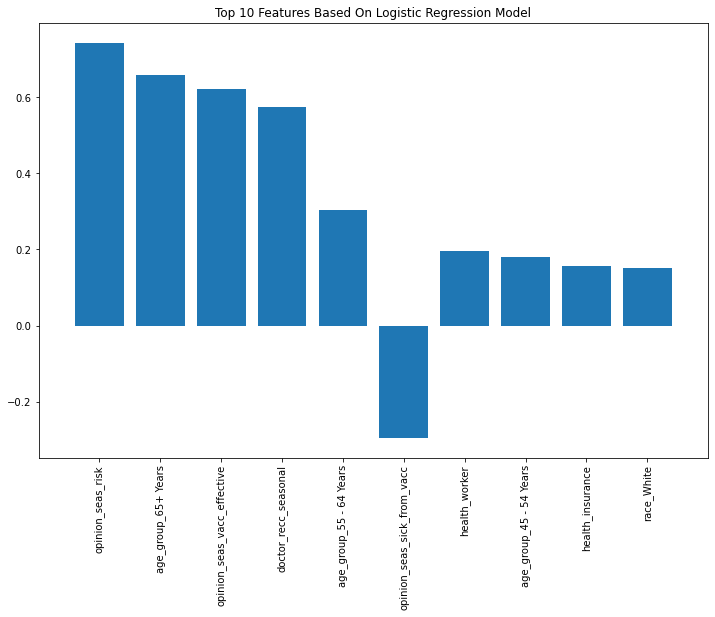

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

lr_top_n = 10
lr_top_indices = lr_indices[:lr_top_n]
lr_top_importances = coefficients[lr_top_indices]

# Plot the top 10 features
plt.figure(figsize=(12, 8))
plt.title("Top 10 Features Based On Logistic Regression Model")
plt.bar(range(lr_top_n), lr_top_importances, align="center")
plt.xticks(range(lr_top_n), X_train.columns[lr_top_indices], rotation=90)
plt.xlim([-1, lr_top_n])
plt.show()


### Using Confusion Matrix Visualization
To display the performance of the classification model in terms of true positives, true negatives, false positives, and false negatives.
- **Objective** To give us a clear view of how well the model is performing on the test data, particularly in identifying the correct and incorrect predictions.

C:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


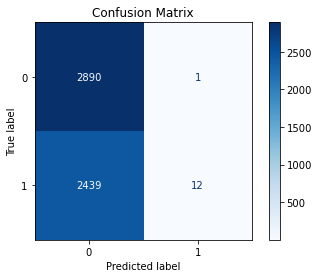

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Findings Based on Logistic Regression
- The model is having a very high Fals positive rate and a very True positive rate

### Using a Decision Tree Model
- Later evaluating the model using various metrics

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Scaling the features first

# Initializing and training the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Get feature importances
dt_importances = dt_model.feature_importances_

# Geting feature indices sorted by importance
dt_indices = np.argsort(dt_importances)[::-1]

# Selecting the top 10 features
dt_top_n = 10
dt_top_indices = dt_indices[:dt_top_n]
feature_names = X.columns # for getting feature names
# Print out the top features
print("Top 10 features based on Decision Tree importance:")
for i in range(dt_top_n):
    dt_feature_name = feature_names[dt_top_indices[i]]
    print(f"{i + 1}. Feature {dt_top_indices[i]} : '{dt_feature_name}' (importance: {dt_importances[dt_top_indices[i]]:.4f})")

# Transforming the training and test data to only include top features
X_train_dt_selected = X_train_scaled[:, dt_top_indices]
X_test_dt_selected = X_test_scaled[:, dt_top_indices]

# Training again the model using the selected features
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_dt_selected, y_train)

# Predicting using our model on the test data
y_pred_2 = rf_model.predict(X_test_dt_selected)

# Outputing the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_2))

Top 10 features based on Decision Tree importance:
1. Feature 13 : 'opinion_seas_vacc_effective' (importance: 0.1568)
2. Feature 0 : 'respondent_id' (importance: 0.1169)
3. Feature 8 : 'doctor_recc_seasonal' (importance: 0.0975)
4. Feature 14 : 'opinion_seas_risk' (importance: 0.0651)
5. Feature 21 : 'age_group_65+ Years' (importance: 0.0313)
6. Feature 15 : 'opinion_seas_sick_from_vacc' (importance: 0.0304)
7. Feature 16 : 'household_adults' (importance: 0.0194)
8. Feature 12 : 'health_insurance' (importance: 0.0186)
9. Feature 17 : 'household_children' (importance: 0.0174)
10. Feature 9 : 'chronic_med_condition' (importance: 0.0142)
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      2891
           1       0.70      0.69      0.69      2451

    accuracy                           0.72      5342
   macro avg       0.72      0.72      0.72      5342
weighted avg       0.72      0.72      0.72      5342

Confusi

In [88]:
# Get feature importances

feature_importance_dict = dict(zip(feature_names, dt_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 features
top_10_features = sorted_features[:10]

# Creating a DataFrame with feature names only
top_10_feature_names = [feature for feature, dt_importance in top_10_features]
top_10_df = pd.DataFrame(top_10_feature_names, columns=["Features BasedOn Decision Tree Model"])

top_10_df

,Features BasedOn Decision Tree Model
0,opinion_seas_vacc_effective
1,respondent_id
2,doctor_recc_seasonal
3,opinion_seas_risk
4,age_group_65+ Years
5,opinion_seas_sick_from_vacc
6,household_adults
7,health_insurance
8,household_children
9,chronic_med_condition


### Bar Chart of Feature Importances

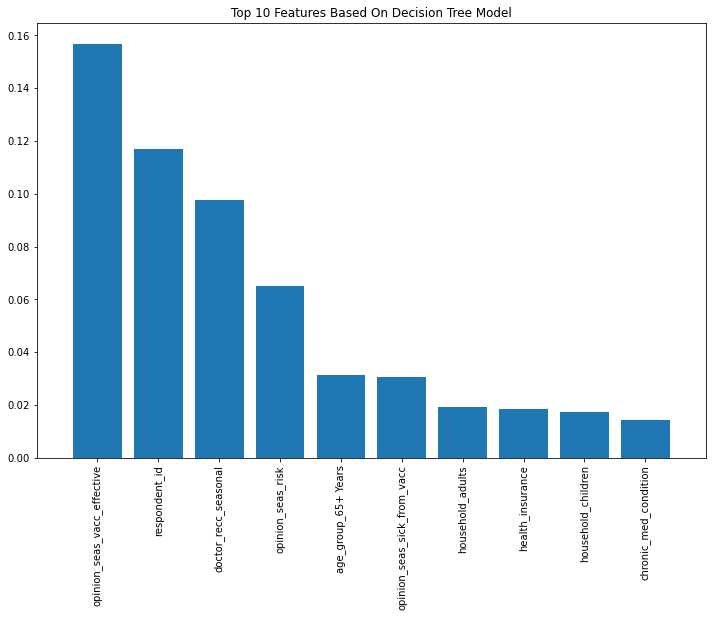

In [89]:
dt_top_n = 10
dt_top_indices = dt_indices[:dt_top_n]
dt_top_importances = dt_importances[dt_top_indices]

# Plot the top 10 features
plt.figure(figsize=(12, 8))
plt.title("Top 10 Features Based On Decision Tree Model")
plt.bar(range(dt_top_n), dt_top_importances, align="center")
plt.xticks(range(dt_top_n), X_train.columns[dt_top_indices], rotation=90)
plt.xlim([-1, dt_top_n])
plt.show()



### Using Confusion Matrix Visualization
To display the performance of the classification model in terms of true positives, true negatives, false positives, and false negatives.
- **Objective** To give us a clear view of how well the model is performing on the test data, particularly in identifying the correct and incorrect predictions.

C:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


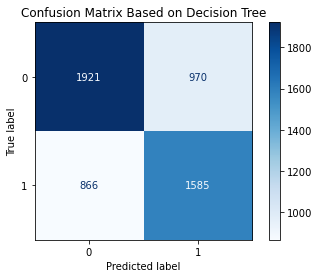

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix Based on Decision Tree')
plt.show()

# Findings Based on Decision Trees
- The model is having a very high True Negatives and a very high True positives predictions
- This tells that our model is not biased.

### ROC Curve To Help in Visualizing The Performance of the Classification Model
- This will show us the trade-off between true positive rate and false positive rate

C:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


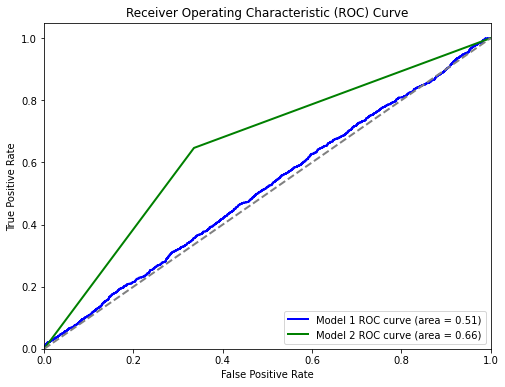

In [91]:
from sklearn.metrics import roc_curve, auc

y_pred_1 = lr_model.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_1)
roc_auc1 = auc(fpr1, tpr1)

# For Model 2
y_pred_2 = dt_model.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_2)
roc_auc2 = auc(fpr2, tpr2)



# Ploting both ROC curves on the same plot
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Model 1 ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Model 2 ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Findings Based on ROC Curve
- Model 2 which is the Decision Tree model is performing much better and thus is which we should use
- This is because it stretches towards the top corner meaning it is closer to 1
- This tells us it has a high rate o f true positives given true predictions

### Conclussion based on features in our model

In [92]:
print(f"The following were the top 10 most influential features based on Logistic Regression Model: {lr_top_indices} We are therefore 77% confident that our model will effectively predict the vaccination outcome given the features")

The following were the top 10 most influential features based on Logistic Regression Model: [14 21 13  8 20 15 11 19 12 27] We are therefore 77% confident that our model will effectively predict the vaccination outcome given the features


In [93]:
print(f"The following were the top 10 most influential features based on Decision Tree Model: {dt_top_indices} We are therefore 73% confident that our model will effectively predict the vaccination outcome given the features")

The following were the top 10 most influential features based on Decision Tree Model: [13  0  8 14 21 15 16 12 17  9] We are therefore 73% confident that our model will effectively predict the vaccination outcome given the features


## **Conclusion**
By leveraging Logistic Regression for feature selection and using Random Forest for the final predictive modeling, I have developed a streamlined and focused model that is based on the most relevant features. The evaluation of the Random Forest model indicates how effectively these features contribute to accurate predictions. This approach balances both feature selection with model evaluation, ensuring that the final model is both efficient and effective.

### To All Our Stakeholders
-- Using the features provided by our models, new policies can be made, resources allocated, and plans made to drive vaccination sbased on them.
-- Stakeholders are now able to use the features to ome up with incentives on the groups that are less likely to be vaccinated thus curbing the spread of the virus.
-- Public health departments can now use this features to their advantage in developing target interventions in specific populations whereby the feature depicts that they are lesss likely to get the vaccine